本节我们利用卷积神经网络对CIFAR-10数据集进行识别，卷积神经网络可以分为两大部分。

首先是图像的特征提取：通过卷积层1，池化层1，卷积层2，池化层2的处理，提取图像的特征

然后是一个全连接神经网络：包含平坦层，隐藏层和输出层组成的类神经网路

# 数据预处理

In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
(x_img_train, y_label_train), (x_img_test, y_label_test) = cifar10.load_data()

In [3]:
print('train data:', 'images:', x_img_train.shape, 'labels:', y_label_train.shape)
print('test data:', 'images:', x_img_test.shape, 'labels:', y_label_test.shape)

train data: images: (50000, 32, 32, 3) labels: (50000, 1)
test data: images: (10000, 32, 32, 3) labels: (10000, 1)


In [4]:
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [5]:
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

# 建立模型

导入所需模块

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [7]:
model = Sequential() 

In [8]:
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape = (32, 32, 3), activation='relu', padding='same'))

In [9]:
model.add(Dropout(rate = 0.25))

In [10]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [11]:
model.add(Conv2D(filters=64, kernel_size=(3,3),activation='relu', padding='same'))

In [12]:
model.add(Dropout(0.25))

In [13]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [14]:
model.add(Flatten())
model.add(Dropout(0.25))

In [15]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate = 0.25))

In [16]:
model.add(Dense(10, activation='softmax'))

In [17]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

# 进行训练

In [18]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
train_history = model.fit(x_img_train_normalize, y_label_train_OneHot, validation_split=0.2, epochs=10, batch_size=128, verbose=2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
 - 117s - loss: 1.5013 - acc: 0.4598 - val_loss: 1.2852 - val_acc: 0.5757
Epoch 2/10
 - 114s - loss: 1.1447 - acc: 0.5938 - val_loss: 1.1201 - val_acc: 0.6316
Epoch 3/10
 - 113s - loss: 0.9862 - acc: 0.6532 - val_loss: 1.0116 - val_acc: 0.6655
Epoch 4/10
 - 113s - loss: 0.8786 - acc: 0.6905 - val_loss: 0.9643 - val_acc: 0.6853
Epoch 5/10
 - 114s - loss: 0.7972 - acc: 0.7198 - val_loss: 0.9035 - val_acc: 0.6964
Epoch 6/10
 - 112s - loss: 0.7148 - acc: 0.7478 - val_loss: 0.8678 - val_acc: 0.7078
Epoch 7/10
 - 113s - loss: 0.6390 - acc: 0.7747 - val_loss: 0.8378 - val_acc: 0.7167
Epoch 8/10
 - 112s - loss: 0.5713 - acc: 0.7991 - val_loss: 0.7935 - val_acc: 0.7384
Epoch 9/10
 - 112s - loss: 0.4952 - acc: 0.8270 - val_loss: 0.7912 - val_acc: 0.7278
Epoch 10/10
 - 113s - loss: 0.4411 - acc: 0.8465 - val_loss: 0.7709 - val_acc: 0.7356


In [20]:
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):#输入参数：训练产生的train_history,训练数据执行结果,验证数据执行结果
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel('Train')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc = 'upper left')#显示图例，且位于左上角
    plt.show()

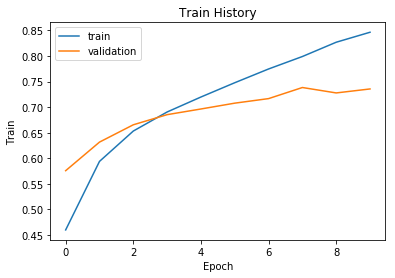

In [21]:
show_train_history(train_history, 'acc', 'val_acc')

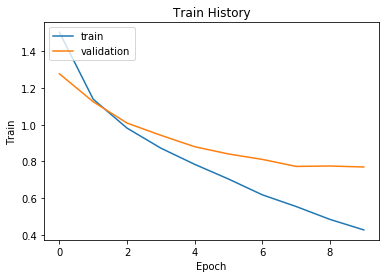

In [22]:
show_train_history(train_history, 'loss', 'val_loss')

无论是训练集还是验证集，误差都是越来越小，而且后期训练集误差比验证集小。

# 评估模型的准确率

In [22]:
scores = model.evaluate(x_img_test_normalize, y_label_test_OneHot, verbose=0)
scores[1]

0.7341

# 进行预测

In [24]:
prediction = model.predict_classes(x_img_test_normalize)

In [25]:
prediction[: 10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=int64)

In [26]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images, labels, prediction, idx, num = 10):
#函数的参数分别是images（数字图像），labels（真实值），prediction（预测结果），idx(开始显示的数据index)，num(要显示的数据项数，默认是10.不超过25)
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num > 25: num = 25
    for i in range(0, num):
        #绘制图形
        ax = plt.subplot(5, 5, i + 1)
        ax.imshow(images[idx], cmap = 'binary')
        title = str(i) + '.' + label_dict[labels[i][0]]#设置标题
        if len(prediction)>0:#如果传入了预测结果
            title+= '=>' + label_dict[prediction[i]]#标题
        
        ax.set_title(title, fontsize = 10)#设置子图形标题
        ax.set_xticks([]);ax.set_yticks([])#设置不显示刻度
        idx+=1#读取下一项
    plt.show()

In [27]:
label_dict = {0 : 'airplane' , 1 : 'automobile', 2 : 'bird', 3 : 'cat', 4 : 'deer', 
             5 : 'dog', 6 : 'frog', 7 : 'horse', 8 : 'ship', 9 : 'truck'}

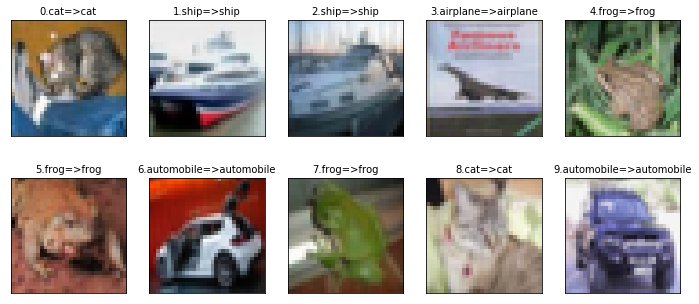

In [28]:
plot_images_labels_prediction(x_img_test, y_label_test, prediction, 0, 10)

# 查看预测概率

In [30]:
Predicred_Probability = model.predict(x_img_test_normalize)

In [33]:
def show_Predicted_Probability(y, prediction, x_img, Predicred_Probability, i):
    #输入参数分别为真实值，预测结果，预测的图像，预测概率，开始显示的数据
    
    #显示真实值和预测结果
    print('label:', label_dict[y[i][0]], 'predict:',label_dict[prediction[i]])
    
    #设置图像大小，并显示图像照片
    plt.figure(figsize=(2, 2))
    plt.imshow(np.reshape(x_img_test[i], (32, 32, 3)))
    plt.show()
    
    #使用for循环读取Predicted_Probability显示预测概率
    for j in range(10):
        print(label_dict[j] + ' Probability:%1.9f'%(Predicred_Probability[i][j]))

label: cat predict: cat


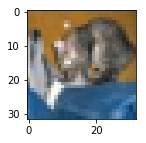

airplane Probability:0.010796775
automobile Probability:0.005239377
bird Probability:0.038103689
cat Probability:0.368458748
deer Probability:0.018060206
dog Probability:0.352402121
frog Probability:0.184063271
horse Probability:0.004228084
ship Probability:0.011669701
truck Probability:0.006978075


In [35]:
show_Predicted_Probability(y_label_test, prediction, x_img_test, Predicred_Probability, 0)

label: airplane predict: airplane


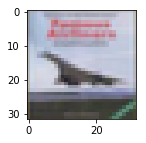

airplane Probability:0.666023433
automobile Probability:0.004257306
bird Probability:0.076016106
cat Probability:0.001304134
deer Probability:0.004320294
dog Probability:0.000061885
frog Probability:0.000117731
horse Probability:0.000029754
ship Probability:0.246716410
truck Probability:0.001152929


In [37]:
show_Predicted_Probability(y_label_test, prediction, x_img_test, Predicred_Probability, 3)

# 显示混淆矩阵

In [39]:
prediction.shape

(10000,)

In [40]:
y_label_test.shape

(10000, 1)

In [41]:
y_label_test.reshape(-1)

array([3, 8, 8, ..., 5, 1, 7])

In [43]:
import pandas as pd
print(label_dict)
pd.crosstab(y_label_test.reshape(-1), prediction, rownames = ['label'], colnames = ['predict'])

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,795,8,76,10,7,5,18,3,48,30
1,21,814,22,13,5,4,19,3,27,72
2,53,1,687,31,70,52,80,16,5,5
3,21,7,123,473,45,176,116,18,10,11
4,23,2,128,47,663,22,91,17,6,1
5,8,3,92,142,38,627,57,24,3,6
6,4,2,45,30,9,13,894,2,1,0
7,16,0,55,27,74,67,17,732,3,9
8,55,28,37,13,5,8,14,1,822,17


# 建立三次卷积运算的神经网络

In [48]:
model = Sequential()  

In [49]:
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(32, 32, 3),activation='relu', padding='same'))
model.add(Dropout(0.3))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [50]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Dropout(0.3))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [51]:
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Dropout(0.3))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [53]:
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(2500, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1500, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

In [54]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_5 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)        36928     
__________

In [55]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [56]:
train_history = model.fit(x_img_train_normalize, y_label_train_OneHot, validation_split=0.2, epochs=50, batch_size=300, verbose=2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/50
 - 360s - loss: 1.8946 - acc: 0.2903 - val_loss: 2.0824 - val_acc: 0.2797
Epoch 2/50
 - 314s - loss: 1.4903 - acc: 0.4519 - val_loss: 1.7084 - val_acc: 0.4020
Epoch 3/50
 - 306s - loss: 1.2970 - acc: 0.5277 - val_loss: 1.3024 - val_acc: 0.5331
Epoch 4/50
 - 307s - loss: 1.1657 - acc: 0.5804 - val_loss: 1.1250 - val_acc: 0.6001
Epoch 5/50
 - 305s - loss: 1.0505 - acc: 0.6250 - val_loss: 1.0112 - val_acc: 0.6386
Epoch 6/50
 - 304s - loss: 0.9607 - acc: 0.6581 - val_loss: 0.9829 - val_acc: 0.6612
Epoch 7/50
 - 305s - loss: 0.8849 - acc: 0.6860 - val_loss: 0.9526 - val_acc: 0.6666
Epoch 8/50
 - 304s - loss: 0.8035 - acc: 0.7171 - val_loss: 0.7898 - val_acc: 0.7268
Epoch 9/50
 - 1578s - loss: 0.7478 - acc: 0.7353 - val_loss: 0.7768 - val_acc: 0.7314
Epoch 10/50
 - 306s - loss: 0.6991 - acc: 0.7515 - val_loss: 0.7903 - val_acc: 0.7243
Epoch 11/50
 - 306s - loss: 0.6497 - acc: 0.7700 - val_loss: 0.7852 - val_acc: 0.7316
Epoch 12/50


In [57]:
scores = model.evaluate(x_img_test_normalize, y_label_test_OneHot, verbose=0)
scores[1]

0.7884

# 模型的保存和加载

In [64]:
model.save_weights('cifarCnnModel.h5')
print("Saved model to disk")

Saved model to disk


In [65]:
try:
    model.load_weights('cifarCnnModel.h5')
    print('加载模型成功!继续训练新模型')
except:
    print('加载模型失败！开始训练一个新模型')

加载模型成功!继续训练新模型
